# Unleash the Ray - Random Search

Let's revisit our random search example but now with Ray

A lot of this code is going to be familiar as we already had our pipeline wraped in a function

In [1]:
%load_ext autoreload
%autoreload 2

from dependencies import *
from tuning import *

Loading dependencies we have already seen...
Done...


### Let's start Ray

In [3]:
ray.shutdown()
ray.init(num_cpus=10,num_gpus=0, include_webui=True)

2020-06-12 10:11:45,766	INFO resource_spec.py:204 -- Starting Ray with 33.54 GiB memory available for workers and up to 16.79 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-06-12 10:11:46,037	INFO services.py:1168 -- View the Ray dashboard at localhost:8266


{'node_ip_address': '192.168.1.39',
 'raylet_ip_address': '192.168.1.39',
 'redis_address': '192.168.1.39:44993',
 'object_store_address': '/tmp/ray/session_2020-06-12_10-11-45_763624_130054/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2020-06-12_10-11-45_763624_130054/sockets/raylet',
 'webui_url': 'localhost:8266',
 'session_dir': '/tmp/ray/session_2020-06-12_10-11-45_763624_130054'}

After initialisation the [Ray Dashboard](https://docs.ray.io/en/master/ray-dashboard.html) is available on the **webui_url** port

## Go Random Go!

So to move into a random search configuration we just need to change our search parameters to use `distributions`

In our last example:

```
ray_tuning_config = {
    'randomforestclassifier__n_estimators': tune.grid_search([1,5,15,50,100]),
    'randomforestclassifier__criterion': tune.grid_search(['gini', 'entropy']),
    'randomforestclassifier__max_features': tune.grid_search(['auto', 'sqrt', 'log2']),
    'randomforestclassifier__bootstrap': tune.grid_search([True, False]),
    'randomforestclassifier__min_samples_leaf': tune.grid_search([1,2,3,4]),
    'randomforestclassifier__min_samples_split': tune.grid_search([3,4,5,6])
}
```

Replace grid search with other tune distribution that we can sample from >> [read the docs](https://docs.ray.io/en/latest/tune/api_docs/grid_random.html?highlight=tune.grid#random-distributions-api)

Choose appropriate distriutions for the different parameter types

In [4]:
ray_tuning_config = {
    'randomforestclassifier__n_estimators': tune.randint(1, 150),
    'randomforestclassifier__criterion': tune.choice(['gini', 'entropy']),
    'randomforestclassifier__max_features': tune.choice(['auto', 'sqrt', 'log2']),
    'randomforestclassifier__bootstrap': tune.choice([True, False]),
    'randomforestclassifier__min_samples_leaf': tune.randint(1,4),
    'randomforestclassifier__min_samples_split': tune.randint(3,6)
}

There is a slight change to the run function too

In [5]:
analysis = tune.run(
                e2e_simple_training,
                config=ray_tuning_config,
    
                num_samples=50, # Specify the number of samples to make from (non grid) distributions
    
                resources_per_trial=dict(cpu=1, gpu=0))

Trial name,status,loc,randomforestclassifier__bootstrap,randomforestclassifier__criterion,randomforestclassifier__max_features,randomforestclassifier__min_samples_leaf,randomforestclassifier__min_samples_split,randomforestclassifier__n_estimators
e2e_simple_training_00001,PENDING,,1,gini,log2,1,5,16
e2e_simple_training_00002,PENDING,,0,entropy,auto,3,4,52
e2e_simple_training_00003,PENDING,,1,entropy,auto,2,5,8
e2e_simple_training_00004,PENDING,,1,gini,log2,3,4,137
e2e_simple_training_00005,PENDING,,0,gini,log2,1,5,79
e2e_simple_training_00006,PENDING,,1,entropy,log2,3,3,128
e2e_simple_training_00007,PENDING,,0,gini,auto,3,3,73
e2e_simple_training_00008,PENDING,,1,gini,log2,1,3,92
e2e_simple_training_00009,PENDING,,0,gini,auto,1,3,68
e2e_simple_training_00010,PENDING,,0,entropy,log2,2,4,70


(pid=130237) Loading dependencies we have already seen...
(pid=130241) Loading dependencies we have already seen...
(pid=130234) Loading dependencies we have already seen...
(pid=130236) Loading dependencies we have already seen...
(pid=130240) Loading dependencies we have already seen...
(pid=130238) Loading dependencies we have already seen...
(pid=130235) Loading dependencies we have already seen...
(pid=130239) Loading dependencies we have already seen...
(pid=130232) Loading dependencies we have already seen...
(pid=130233) Loading dependencies we have already seen...
(pid=130236) Done...
(pid=130236) 2020-06-12 10:13:24,233	INFO trainable.py:217 -- Getting current IP.
(pid=130237) Done...
(pid=130237) 2020-06-12 10:13:24,280	INFO trainable.py:217 -- Getting current IP.
(pid=130235) 2020-06-12 10:13:24,330	INFO trainable.py:217 -- Getting current IP.
(pid=130235) Done...
(pid=130234) 2020-06-12 10:13:24,345	INFO trainable.py:217 -- Getting current IP.
(pid=130241) 2020-06-12 10:13

2020-06-12 10:13:24,625	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


(pid=130240) 2020-06-12 10:13:24,443	INFO trainable.py:217 -- Getting current IP.
(pid=130240) Done...
(pid=130238) Done...
(pid=130238) 2020-06-12 10:13:24,523	INFO trainable.py:217 -- Getting current IP.
(pid=130239) 2020-06-12 10:13:24,558	INFO trainable.py:217 -- Getting current IP.
(pid=130239) Done...
Result for e2e_simple_training_00001:
  date: 2020-06-12_10-13-24
  done: true
  experiment_id: dd2a96ff68e0434fb756113d4ca3156f
  experiment_tag: 1_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=5,randomforestclassifier__n_estimators=16
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9654090345738779
  node_ip: 192.168.1.39
  pid: 130241
  std_f1_score: 0.017374374024209487
  time_since_restore: 0.25420713424682617
  time_this_iter_s: 0.25420713424682617
  time_total_s: 0.25420713424682617
  timestamp: 1

2020-06-12 10:13:24,711	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00003:
  date: 2020-06-12_10-13-24
  done: true
  experiment_id: 014386b8b7c74053b3761c33fe6d8c89
  experiment_tag: 3_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=5,randomforestclassifier__n_estimators=8
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.964076919249333
  node_ip: 192.168.1.39
  pid: 130238
  std_f1_score: 0.016505582420138706
  time_since_restore: 0.17743706703186035
  time_this_iter_s: 0.17743706703186035
  time_total_s: 0.17743706703186035
  timestamp: 1591953204
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00003'
  


2020-06-12 10:13:25,241	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}
2020-06-12 10:13:25,268	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}
2020-06-12 10:13:25,386	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00005:
  date: 2020-06-12_10-13-25
  done: true
  experiment_id: 83249d13356a417c8a5eaf2f6f56c7de
  experiment_tag: 5_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=5,randomforestclassifier__n_estimators=79
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9722533560079384
  node_ip: 192.168.1.39
  pid: 130236
  std_f1_score: 0.01570732598866534
  time_since_restore: 0.9994995594024658
  time_this_iter_s: 0.9994995594024658
  time_total_s: 0.9994995594024658
  timestamp: 1591953205
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00005'
  
Result for e2e_simple_training_00002:
  date: 2020-06-12_10-13-25
  done: true
  experiment_id: 239ffba7fa4849b48f5cc72cadc0bc1d
  experiment_tag: 2_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=ent

2020-06-12 10:13:25,451	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00007:
  date: 2020-06-12_10-13-25
  done: true
  experiment_id: 638afa7c35874861a5e3ed449f6ef870
  experiment_tag: 7_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=73
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9692375209094617
  node_ip: 192.168.1.39
  pid: 130240
  std_f1_score: 0.01602882167255805
  time_since_restore: 0.9709656238555908
  time_this_iter_s: 0.9709656238555908
  time_total_s: 0.9709656238555908
  timestamp: 1591953205
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00007'
  


2020-06-12 10:13:25,808	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=130503) Loading dependencies we have already seen...
Result for e2e_simple_training_00009:
  date: 2020-06-12_10-13-25
  done: true
  experiment_id: e53d37a5d63042ef8f48e408df4d945e
  experiment_tag: 9_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=68
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.974637859254884
  node_ip: 192.168.1.39
  pid: 130232
  std_f1_score: 0.01548042947107295
  time_since_restore: 1.186776876449585
  time_this_iter_s: 1.186776876449585
  time_total_s: 1.186776876449585
  timestamp: 1591953205
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00009
  
(pid=130506) Loading dependencies we have already seen...
(pid=130508) Loading dependencies we have already seen...
(pid=130505) Loading dependencies we have already seen...


2020-06-12 10:13:26,379	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}
2020-06-12 10:13:26,449	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00004:
  date: 2020-06-12_10-13-26
  done: true
  experiment_id: 4dc9f098b1b949368baf08dbc8c5d2d2
  experiment_tag: 4_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=137
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9637023256355611
  node_ip: 192.168.1.39
  pid: 130235
  std_f1_score: 0.018070167109811092
  time_since_restore: 2.037821054458618
  time_this_iter_s: 2.037821054458618
  time_total_s: 2.037821054458618
  timestamp: 1591953206
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00004'
  
Result for e2e_simple_training_00008:
  date: 2020-06-12_10-13-26
  done: true
  experiment_id: d056ca7df121478f9c079bf0dc01ae8c
  experiment_tag: 8_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=gini,r

2020-06-12 10:13:26,909	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00006:
  date: 2020-06-12_10-13-26
  done: true
  experiment_id: cbc7dbb07317436c9d2d340c6bd893a7
  experiment_tag: 6_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=128
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9706053166345002
  node_ip: 192.168.1.39
  pid: 130239
  std_f1_score: 0.017531877490541577
  time_since_restore: 2.3396384716033936
  time_this_iter_s: 2.3396384716033936
  time_total_s: 2.3396384716033936
  timestamp: 1591953206
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00006'
  
(pid=130519) Loading dependencies we have already seen...
(pid=130564) Loading dependencies we have already seen...
(pid=130503) 2020-06-12 10:13:27,139	INFO trainable.py:217 -- Getting current IP.
(pid=130503) Done...
(pi

2020-06-12 10:13:27,947	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


(pid=130534) 2020-06-12 10:13:27,856	INFO trainable.py:217 -- Getting current IP.
(pid=130534) Done...
Result for e2e_simple_training_00011:
  date: 2020-06-12_10-13-27
  done: true
  experiment_id: 553c3b0cafc14a579ce3ba5b39afc950
  experiment_tag: 11_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=27
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9692623981366355
  node_ip: 192.168.1.39
  pid: 130505
  std_f1_score: 0.01692415607147674
  time_since_restore: 0.5188477039337158
  time_this_iter_s: 0.5188477039337158
  time_total_s: 0.5188477039337158
  timestamp: 1591953207
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00011'
  
(pid=130535) Done...
(pid=130535) 2020-06-12 10:13:27,918	INFO trainable.py:217 -- Getting current IP.
(pid=130532) Done

Trial name,status,loc,randomforestclassifier__bootstrap,randomforestclassifier__criterion,randomforestclassifier__max_features,randomforestclassifier__min_samples_leaf,randomforestclassifier__min_samples_split,randomforestclassifier__n_estimators,iter,total time (s)
e2e_simple_training_00020,PENDING,,0,entropy,sqrt,1,4,13,,
e2e_simple_training_00021,PENDING,,0,entropy,log2,3,3,2,,
e2e_simple_training_00022,PENDING,,0,gini,auto,3,4,42,,
e2e_simple_training_00023,PENDING,,0,entropy,log2,1,3,99,,
e2e_simple_training_00024,PENDING,,1,entropy,sqrt,1,5,60,,
e2e_simple_training_00025,PENDING,,1,entropy,auto,1,4,102,,
e2e_simple_training_00026,PENDING,,1,entropy,log2,3,4,38,,
e2e_simple_training_00010,RUNNING,,0,entropy,log2,2,4,70,,
e2e_simple_training_00012,RUNNING,,0,gini,auto,1,3,113,,
e2e_simple_training_00013,RUNNING,,1,entropy,sqrt,2,5,61,,


2020-06-12 10:13:28,201	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=130519) 2020-06-12 10:13:28,164	INFO trainable.py:217 -- Getting current IP.
(pid=130519) Done...
(pid=130564) 2020-06-12 10:13:28,163	INFO trainable.py:217 -- Getting current IP.
(pid=130564) Done...
Result for e2e_simple_training_00010:
  date: 2020-06-12_10-13-28
  done: true
  experiment_id: 072fdaf349f84234bfc0b8028ec092f0
  experiment_tag: 10_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=70
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9707776630834066
  node_ip: 192.168.1.39
  pid: 130503
  std_f1_score: 0.017385106001735463
  time_since_restore: 1.0327427387237549
  time_this_iter_s: 1.0327427387237549
  time_total_s: 1.0327427387237549
  timestamp: 1591953208
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00010'
  


2020-06-12 10:13:28,534	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


(pid=130571) Loading dependencies we have already seen...
Result for e2e_simple_training_00015:
  date: 2020-06-12_10-13-28
  done: true
  experiment_id: 079f299e4bf349a3be458b9e019bd735
  experiment_tag: 15_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=37
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9639185258538217
  node_ip: 192.168.1.39
  pid: 130534
  std_f1_score: 0.018848224000225868
  time_since_restore: 0.6580455303192139
  time_this_iter_s: 0.6580455303192139
  time_total_s: 0.6580455303192139
  timestamp: 1591953208
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00015'
  


2020-06-12 10:13:28,780	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}
2020-06-12 10:13:28,821	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


(pid=130585) 2020-06-12 10:13:28,596	INFO trainable.py:217 -- Getting current IP.
(pid=130585) Done...
(pid=130594) Loading dependencies we have already seen...
Result for e2e_simple_training_00019:
  date: 2020-06-12_10-13-28
  done: true
  experiment_id: 09c92ce3237744209fce9f6d3209498c
  experiment_tag: 19_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=4
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9538328657132574
  node_ip: 192.168.1.39
  pid: 130585
  std_f1_score: 0.017708334318356694
  time_since_restore: 0.15791940689086914
  time_this_iter_s: 0.15791940689086914
  time_total_s: 0.15791940689086914
  timestamp: 1591953208
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00019
  
Result for e2e_simple_training_00013:
  date: 2020-06-12_10-

2020-06-12 10:13:29,290	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}
2020-06-12 10:13:29,325	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=130546) Loading dependencies we have already seen...
Result for e2e_simple_training_00012:
  date: 2020-06-12_10-13-29
  done: true
  experiment_id: 63098a23b76b468b8dcfe1a5a8e6b72e
  experiment_tag: 12_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=113
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9732586828757077
  node_ip: 192.168.1.39
  pid: 130508
  std_f1_score: 0.014020829354738468
  time_since_restore: 1.9510838985443115
  time_this_iter_s: 1.9510838985443115
  time_total_s: 1.9510838985443115
  timestamp: 1591953209
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00012'
  
Result for e2e_simple_training_00016:
  date: 2020-06-12_10-13-29
  done: true
  experiment_id: fbee399d9f6e452a9fccf73941e8e4e4
  experiment_tag: 16_randomforestcla

2020-06-12 10:13:29,432	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00018:
  date: 2020-06-12_10-13-29
  done: true
  experiment_id: 4f80fa21e81645a39d491097a8debb5b
  experiment_tag: 18_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=50
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9763941683498665
  node_ip: 192.168.1.39
  pid: 130564
  std_f1_score: 0.012763209472700673
  time_since_restore: 1.254049301147461
  time_this_iter_s: 1.254049301147461
  time_total_s: 1.254049301147461
  timestamp: 1591953209
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00018
  
(pid=130571) Done...
(pid=130571) 2020-06-12 10:13:29,636	INFO trainable.py:217 -- Getting current IP.
(pid=130560) Loading dependencies we have already seen...


2020-06-12 10:13:30,005	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=130594) 2020-06-12 10:13:29,850	INFO trainable.py:217 -- Getting current IP.
(pid=130594) Done...
Result for e2e_simple_training_00021:
  date: 2020-06-12_10-13-29
  done: true
  experiment_id: bea211fc356540128b9c2d45ae481651
  experiment_tag: 21_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=2
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9481653794476766
  node_ip: 192.168.1.39
  pid: 130594
  std_f1_score: 0.030195244074021767
  time_since_restore: 0.14188814163208008
  time_this_iter_s: 0.14188814163208008
  time_total_s: 0.14188814163208008
  timestamp: 1591953209
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00021'
  


2020-06-12 10:13:30,115	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}
2020-06-12 10:13:30,240	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00020:
  date: 2020-06-12_10-13-30
  done: true
  experiment_id: ec7310643c3349e8aa261e1cd3f1fc8b
  experiment_tag: 20_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=13
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9651500302083109
  node_ip: 192.168.1.39
  pid: 130571
  std_f1_score: 0.013138571753952156
  time_since_restore: 0.46683192253112793
  time_this_iter_s: 0.46683192253112793
  time_total_s: 0.46683192253112793
  timestamp: 1591953210
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00020'
  
Result for e2e_simple_training_00014:
  date: 2020-06-12_10-13-30
  done: true
  experiment_id: fefaf2a4ab104ecfbafe37ab0a7a3f04
  experiment_tag: 14_randomforestclassifier__bootstrap=True,randomforestclassifier__crite

2020-06-12 10:13:30,680	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


(pid=130734) Loading dependencies we have already seen...
Result for e2e_simple_training_00017:
  date: 2020-06-12_10-13-30
  done: true
  experiment_id: 4c1e490aefe84c79833222429ed6431a
  experiment_tag: 17_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=5,randomforestclassifier__n_estimators=115
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9735969368373715
  node_ip: 192.168.1.39
  pid: 130519
  std_f1_score: 0.0160032139949415
  time_since_restore: 2.497235059738159
  time_this_iter_s: 2.497235059738159
  time_total_s: 2.497235059738159
  timestamp: 1591953210
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00017'
  
(pid=130563) 2020-06-12 10:13:30,962	INFO trainable.py:217 -- Getting current IP.
(pid=130563) Done...
(pid=130737) Loading dependencies we have already seen...
(pid=13

2020-06-12 10:13:31,431	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=130741) Loading dependencies we have already seen...
(pid=130735) Loading dependencies we have already seen...
(pid=130560) Done...
(pid=130560) 2020-06-12 10:13:31,403	INFO trainable.py:217 -- Getting current IP.
Result for e2e_simple_training_00022:
  date: 2020-06-12_10-13-31
  done: true
  experiment_id: a653a6005ad14eaeb8243e73976d5eba
  experiment_tag: 22_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=42
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.968000667302497
  node_ip: 192.168.1.39
  pid: 130566
  std_f1_score: 0.015094792431729549
  time_since_restore: 1.0524406433105469
  time_this_iter_s: 1.0524406433105469
  time_total_s: 1.0524406433105469
  timestamp: 1591953211
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00022'
  
(pid=1

2020-06-12 10:13:32,053	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00024:
  date: 2020-06-12_10-13-32
  done: true
  experiment_id: 4483a348311b4e55bde930f7cca9b942
  experiment_tag: 24_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=5,randomforestclassifier__n_estimators=60
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9720598923216036
  node_ip: 192.168.1.39
  pid: 130563
  std_f1_score: 0.015361942474842143
  time_since_restore: 1.080038070678711
  time_this_iter_s: 1.080038070678711
  time_total_s: 1.080038070678711
  timestamp: 1591953212
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00024'
  
(pid=130737) 2020-06-12 10:13:32,040	INFO trainable.py:217 -- Getting current IP.
(pid=130737) Done...
(pid=130734) Done...
(pid=130734) 2020-06-12 10:13:32,119	INFO trainable.py:217 -- Getting current IP.
(pid=130740) 2020-0

2020-06-12 10:13:32,577	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}
2020-06-12 10:13:32,651	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}
2020-06-12 10:13:32,719	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00029:
  date: 2020-06-12_10-13-32
  done: true
  experiment_id: 6e0a75518c1840229247c5fec82a5c60
  experiment_tag: 29_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=9
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9679559561657876
  node_ip: 192.168.1.39
  pid: 130735
  std_f1_score: 0.011158538969646139
  time_since_restore: 0.25303149223327637
  time_this_iter_s: 0.25303149223327637
  time_total_s: 0.25303149223327637
  timestamp: 1591953212
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00029
  
Result for e2e_simple_training_00023:
  date: 2020-06-12_10-13-32
  done: true
  experiment_id: 7a14c4f300b847f084e132c3501e53ac
  experiment_tag: 23_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=

2020-06-12 10:13:32,852	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}
2020-06-12 10:13:32,969	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00025:
  date: 2020-06-12_10-13-32
  done: true
  experiment_id: f810fde0fe6342f583a1b6a4ec5e0578
  experiment_tag: 25_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=102
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.970801382215355
  node_ip: 192.168.1.39
  pid: 130560
  std_f1_score: 0.013531258660220686
  time_since_restore: 1.4399769306182861
  time_this_iter_s: 1.4399769306182861
  time_total_s: 1.4399769306182861
  timestamp: 1591953212
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00025'
  
Result for e2e_simple_training_00028:
  date: 2020-06-12_10-13-32
  done: true
  experiment_id: 7d85b4373cf445ffb75a50e7b2e30b2e
  experiment_tag: 28_randomforestclassifier__bootstrap=False,randomforestclassifier__criterio

Trial name,status,loc,randomforestclassifier__bootstrap,randomforestclassifier__criterion,randomforestclassifier__max_features,randomforestclassifier__min_samples_leaf,randomforestclassifier__min_samples_split,randomforestclassifier__n_estimators,iter,total time (s)
e2e_simple_training_00038,PENDING,,0,gini,log2,3,3,55,,
e2e_simple_training_00039,PENDING,,0,gini,sqrt,2,4,76,,
e2e_simple_training_00040,PENDING,,1,gini,auto,3,5,143,,
e2e_simple_training_00041,PENDING,,1,entropy,log2,2,5,79,,
e2e_simple_training_00042,PENDING,,0,gini,log2,2,4,27,,
e2e_simple_training_00043,PENDING,,1,gini,log2,1,5,70,,
e2e_simple_training_00044,PENDING,,0,entropy,log2,3,5,66,,
e2e_simple_training_00027,RUNNING,,0,entropy,sqrt,1,4,108,,
e2e_simple_training_00030,RUNNING,,1,entropy,log2,3,4,82,,
e2e_simple_training_00031,RUNNING,,0,entropy,auto,1,3,78,,


(pid=130758) Loading dependencies we have already seen...
(pid=130783) Loading dependencies we have already seen...
(pid=130774) 2020-06-12 10:13:33,219	INFO trainable.py:217 -- Getting current IP.
(pid=130774) Done...
(pid=130746) Loading dependencies we have already seen...
(pid=130759) Loading dependencies we have already seen...


2020-06-12 10:13:33,419	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00030:
  date: 2020-06-12_10-13-33
  done: true
  experiment_id: d260369a2ddb4d97a471fd03e399354a
  experiment_tag: 30_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=82
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9692826902764464
  node_ip: 192.168.1.39
  pid: 130740
  std_f1_score: 0.018105892277487594
  time_since_restore: 1.244213581085205
  time_this_iter_s: 1.244213581085205
  time_total_s: 1.244213581085205
  timestamp: 1591953213
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00030'
  


2020-06-12 10:13:33,671	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00031:
  date: 2020-06-12_10-13-33
  done: true
  experiment_id: 7fa0352f64b74012ad893cfcb7692888
  experiment_tag: 31_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=78
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9791322685501551
  node_ip: 192.168.1.39
  pid: 130741
  std_f1_score: 0.009743919381772291
  time_since_restore: 1.4424831867218018
  time_this_iter_s: 1.4424831867218018
  time_total_s: 1.4424831867218018
  timestamp: 1591953213
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00031'
  
(pid=130798) Loading dependencies we have already seen...
(pid=130747) Loading dependencies we have already seen...
(pid=130757) 2020-06-12 10:13:33,765	INFO trainable.py:217 -- Getting current IP.
(pid=130757) Done...


2020-06-12 10:13:33,972	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00033:
  date: 2020-06-12_10-13-33
  done: true
  experiment_id: 4063019513b746db865584f1461f5471
  experiment_tag: 33_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=8
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9539823270857755
  node_ip: 192.168.1.39
  pid: 130757
  std_f1_score: 0.01721958866215919
  time_since_restore: 0.19408631324768066
  time_this_iter_s: 0.19408631324768066
  time_total_s: 0.19408631324768066
  timestamp: 1591953213
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00033'
  


2020-06-12 10:13:34,218	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00027:
  date: 2020-06-12_10-13-34
  done: true
  experiment_id: 6b5da6fe23844827a26b4d3da21a8301
  experiment_tag: 27_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=108
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9763153671417044
  node_ip: 192.168.1.39
  pid: 130739
  std_f1_score: 0.012954446563723122
  time_since_restore: 1.9729692935943604
  time_this_iter_s: 1.9729692935943604
  time_total_s: 1.9729692935943604
  timestamp: 1591953214
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00027'
  
(pid=130758) Done...
(pid=130758) 2020-06-12 10:13:34,467	INFO trainable.py:217 -- Getting current IP.
(pid=130783) 2020-06-12 10:13:34,540	INFO trainable.py:217 -- Getting current IP.
(pid=130783) Done...
(pid=130746) D

2020-06-12 10:13:34,990	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


(pid=130759) Done...
(pid=130759) 2020-06-12 10:13:34,934	INFO trainable.py:217 -- Getting current IP.
Result for e2e_simple_training_00032:
  date: 2020-06-12_10-13-34
  done: true
  experiment_id: d160e0a9a31c4c099cfede7378dc38e1
  experiment_tag: 32_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=69
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9735969368373715
  node_ip: 192.168.1.39
  pid: 130774
  std_f1_score: 0.0160032139949415
  time_since_restore: 1.7593159675598145
  time_this_iter_s: 1.7593159675598145
  time_total_s: 1.7593159675598145
  timestamp: 1591953214
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00032'
  
(pid=130931) Loading dependencies we have already seen...
(pid=130935) Loading dependencies we have already seen...
(pid=

2020-06-12 10:13:35,654	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00036:
  date: 2020-06-12_10-13-35
  done: true
  experiment_id: 9608646f7b8049b985e673bd5c1b564c
  experiment_tag: 36_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=46
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9736365083027249
  node_ip: 192.168.1.39
  pid: 130759
  std_f1_score: 0.011048117152756593
  time_since_restore: 0.6999070644378662
  time_this_iter_s: 0.6999070644378662
  time_total_s: 0.6999070644378662
  timestamp: 1591953215
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00036'
  


2020-06-12 10:13:35,932	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00037:
  date: 2020-06-12_10-13-35
  done: true
  experiment_id: a9ce450e3b7a444d96a94512c83f9b42
  experiment_tag: 37_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=80
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9692826902764464
  node_ip: 192.168.1.39
  pid: 130746
  std_f1_score: 0.018105892277487594
  time_since_restore: 1.2456471920013428
  time_this_iter_s: 1.2456471920013428
  time_total_s: 1.2456471920013428
  timestamp: 1591953215
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00037'
  
(pid=130965) Loading dependencies we have already seen...


2020-06-12 10:13:36,213	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=130931) Done...
(pid=130931) 2020-06-12 10:13:36,146	INFO trainable.py:217 -- Getting current IP.
Result for e2e_simple_training_00038:
  date: 2020-06-12_10-13-36
  done: true
  experiment_id: aa599aadce6b42ba9837b052aaca1c5f
  experiment_tag: 38_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=55
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9665755969151479
  node_ip: 192.168.1.39
  pid: 130798
  std_f1_score: 0.013461964784129936
  time_since_restore: 0.7535190582275391
  time_this_iter_s: 0.7535190582275391
  time_total_s: 0.7535190582275391
  timestamp: 1591953216
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00038
  
(pid=130930) Done...
(pid=130930) 2020-06-12 10:13:36,171	INFO trainable.py:217 -- Getting current IP.


2020-06-12 10:13:36,441	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}
2020-06-12 10:13:36,537	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


(pid=130953) Loading dependencies we have already seen...
Result for e2e_simple_training_00035:
  date: 2020-06-12_10-13-36
  done: true
  experiment_id: a972e46a190a4a3f98ece7bb4c9c4572
  experiment_tag: 35_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=110
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9693391949221153
  node_ip: 192.168.1.39
  pid: 130758
  std_f1_score: 0.013033163510166158
  time_since_restore: 1.9560585021972656
  time_this_iter_s: 1.9560585021972656
  time_total_s: 1.9560585021972656
  timestamp: 1591953216
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00035'
  
Result for e2e_simple_training_00034:
  date: 2020-06-12_10-13-36
  done: true
  experiment_id: 14f7f37190ae410995f3abbd4b4f7d5e
  experiment_tag: 34_randomforestcla

2020-06-12 10:13:36,660	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=130936) 2020-06-12 10:13:36,598	INFO trainable.py:217 -- Getting current IP.
(pid=130936) Done...
Result for e2e_simple_training_00039:
  date: 2020-06-12_10-13-36
  done: true
  experiment_id: fefb3d15747449e19946090b29f4bb69
  experiment_tag: 39_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=76
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9706174505702141
  node_ip: 192.168.1.39
  pid: 130747
  std_f1_score: 0.01707221841229671
  time_since_restore: 1.2007334232330322
  time_this_iter_s: 1.2007334232330322
  time_total_s: 1.2007334232330322
  timestamp: 1591953216
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00039
  
(pid=130938) Loading dependencies we have already seen...


2020-06-12 10:13:37,045	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


(pid=130954) Loading dependencies we have already seen...
Result for e2e_simple_training_00042:
  date: 2020-06-12_10-13-37
  done: true
  experiment_id: cc2dc82437534811a7cbc11f32d0acaf
  experiment_tag: 42_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=27
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.967922095252772
  node_ip: 192.168.1.39
  pid: 130935
  std_f1_score: 0.012986396746177022
  time_since_restore: 0.5288474559783936
  time_this_iter_s: 0.5288474559783936
  time_total_s: 0.5288474559783936
  timestamp: 1591953217
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00042'
  
(pid=130944) Loading dependencies we have already seen...
(pid=130942) Loading dependencies we have already seen...
(pid=130965) 2020-06-12 10:13:37,410	INFO trainable

2020-06-12 10:13:37,686	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}
2020-06-12 10:13:37,717	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00041:
  date: 2020-06-12_10-13-37
  done: true
  experiment_id: 8a2b3bdff4eb46649f923f3f08999ac4
  experiment_tag: 41_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=5,randomforestclassifier__n_estimators=79
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.96790351389727
  node_ip: 192.168.1.39
  pid: 130931
  std_f1_score: 0.0164314287031499
  time_since_restore: 1.5303936004638672
  time_this_iter_s: 1.5303936004638672
  time_total_s: 1.5303936004638672
  timestamp: 1591953217
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00041'
  
Result for e2e_simple_training_00043:
  date: 2020-06-12_10-13-37
  done: true
  experiment_id: 64540a789d73478e92da66cec66e1f73
  experiment_tag: 43_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=gin

2020-06-12 10:13:38,104	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


(pid=130938) 2020-06-12 10:13:37,957	INFO trainable.py:217 -- Getting current IP.
(pid=130938) Done...
Result for e2e_simple_training_00046:
  date: 2020-06-12_10-13-38
  done: true
  experiment_id: 598488d539fd471b89e2e54aeaf226ab
  experiment_tag: 46_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=8
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9637148307269156
  node_ip: 192.168.1.39
  pid: 130938
  std_f1_score: 0.020661335460590118
  time_since_restore: 0.1396467685699463
  time_this_iter_s: 0.1396467685699463
  time_total_s: 0.1396467685699463
  timestamp: 1591953218
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00046'
  


Trial name,status,loc,randomforestclassifier__bootstrap,randomforestclassifier__criterion,randomforestclassifier__max_features,randomforestclassifier__min_samples_leaf,randomforestclassifier__min_samples_split,randomforestclassifier__n_estimators,iter,total time (s)
e2e_simple_training_00040,RUNNING,,1,gini,auto,3,5,143,,
e2e_simple_training_00044,RUNNING,,0,entropy,log2,3,5,66,,
e2e_simple_training_00045,RUNNING,,0,gini,sqrt,2,5,70,,
e2e_simple_training_00047,RUNNING,,0,entropy,sqrt,3,4,62,,
e2e_simple_training_00048,RUNNING,,1,entropy,auto,2,3,140,,
e2e_simple_training_00049,RUNNING,,1,entropy,auto,1,4,76,,
e2e_simple_training_00000,TERMINATED,,1,entropy,auto,1,5,70,0,1.08399
e2e_simple_training_00001,TERMINATED,,1,gini,log2,1,5,16,0,0.254207
e2e_simple_training_00002,TERMINATED,,0,entropy,auto,3,4,52,0,0.890486
e2e_simple_training_00003,TERMINATED,,1,entropy,auto,2,5,8,0,0.177437


2020-06-12 10:13:38,266	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}
2020-06-12 10:13:38,335	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


(pid=130944) Done...
(pid=130954) 2020-06-12 10:13:38,151	INFO trainable.py:217 -- Getting current IP.
(pid=130954) Done...
(pid=130944) 2020-06-12 10:13:38,181	INFO trainable.py:217 -- Getting current IP.
Result for e2e_simple_training_00044:
  date: 2020-06-12_10-13-38
  done: true
  experiment_id: 0809f0afd2774ae6b61c174e92b991d4
  experiment_tag: 44_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=log2,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=5,randomforestclassifier__n_estimators=66
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9763941683498665
  node_ip: 192.168.1.39
  pid: 130965
  std_f1_score: 0.012763209472700673
  time_since_restore: 0.8482086658477783
  time_this_iter_s: 0.8482086658477783
  time_total_s: 0.8482086658477783
  timestamp: 1591953218
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00044'
  
Result for e2e_

2020-06-12 10:13:38,542	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00045:
  date: 2020-06-12_10-13-38
  done: true
  experiment_id: 5ed30546a7b346ac84d37d93af3cbb35
  experiment_tag: 45_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=gini,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=5,randomforestclassifier__n_estimators=70
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9733002301849727
  node_ip: 192.168.1.39
  pid: 130953
  std_f1_score: 0.017173313940619855
  time_since_restore: 0.9742348194122314
  time_this_iter_s: 0.9742348194122314
  time_total_s: 0.9742348194122314
  timestamp: 1591953218
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00045'
  


2020-06-12 10:13:38,904	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': False}


Result for e2e_simple_training_00047:
  date: 2020-06-12_10-13-38
  done: true
  experiment_id: ce94bed6fd864390aa78657f665d1c7f
  experiment_tag: 47_randomforestclassifier__bootstrap=False,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=sqrt,randomforestclassifier__min_samples_leaf=3,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=62
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9736730853450262
  node_ip: 192.168.1.39
  pid: 130954
  std_f1_score: 0.010079499902655047
  time_since_restore: 0.7444872856140137
  time_this_iter_s: 0.7444872856140137
  time_total_s: 0.7444872856140137
  timestamp: 1591953218
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00047'
  


2020-06-12 10:13:39,154	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00049:
  date: 2020-06-12_10-13-39
  done: true
  experiment_id: 4c7d8fd7f54c435ea55aae7c66752ca8
  experiment_tag: 49_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=1,randomforestclassifier__min_samples_split=4,randomforestclassifier__n_estimators=76
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9692041182267215
  node_ip: 192.168.1.39
  pid: 130942
  std_f1_score: 0.018833885702497822
  time_since_restore: 0.835223913192749
  time_this_iter_s: 0.835223913192749
  time_total_s: 0.835223913192749
  timestamp: 1591953219
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00049
  


2020-06-12 10:13:39,757	INFO logger.py:269 -- Removed the following hyperparameter values when logging to tensorboard: {'randomforestclassifier__bootstrap': True}


Result for e2e_simple_training_00048:
  date: 2020-06-12_10-13-39
  done: true
  experiment_id: d801b057c81f49b4a4ee615b16abed90
  experiment_tag: 48_randomforestclassifier__bootstrap=True,randomforestclassifier__criterion=entropy,randomforestclassifier__max_features=auto,randomforestclassifier__min_samples_leaf=2,randomforestclassifier__min_samples_split=3,randomforestclassifier__n_estimators=140
  hostname: cosmos-ml
  iterations_since_restore: 1
  mean_f1_score: 0.9733825186796574
  node_ip: 192.168.1.39
  pid: 130944
  std_f1_score: 0.014428661356016408
  time_since_restore: 1.569586992263794
  time_this_iter_s: 1.569586992263794
  time_total_s: 1.569586992263794
  timestamp: 1591953219
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: 00048
  


Trial name,status,loc,randomforestclassifier__bootstrap,randomforestclassifier__criterion,randomforestclassifier__max_features,randomforestclassifier__min_samples_leaf,randomforestclassifier__min_samples_split,randomforestclassifier__n_estimators,iter,total time (s)
e2e_simple_training_00000,TERMINATED,,1,entropy,auto,1,5,70,0,1.08399
e2e_simple_training_00001,TERMINATED,,1,gini,log2,1,5,16,0,0.254207
e2e_simple_training_00002,TERMINATED,,0,entropy,auto,3,4,52,0,0.890486
e2e_simple_training_00003,TERMINATED,,1,entropy,auto,2,5,8,0,0.177437
e2e_simple_training_00004,TERMINATED,,1,gini,log2,3,4,137,0,2.03782
e2e_simple_training_00005,TERMINATED,,0,gini,log2,1,5,79,0,0.9995
e2e_simple_training_00006,TERMINATED,,1,entropy,log2,3,3,128,0,2.33964
e2e_simple_training_00007,TERMINATED,,0,gini,auto,3,3,73,0,0.970966
e2e_simple_training_00008,TERMINATED,,1,gini,log2,1,3,92,0,1.84014
e2e_simple_training_00009,TERMINATED,,0,gini,auto,1,3,68,0,1.18678


In [6]:
from pprint import pprint
print("Best config: ")
pprint(analysis.get_best_config(metric="mean_f1_score"))

Best config: 
{'randomforestclassifier__bootstrap': False,
 'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 3,
 'randomforestclassifier__n_estimators': 78}


In [7]:
df = analysis.dataframe()
top_n_df = df.nlargest(10, "mean_f1_score")

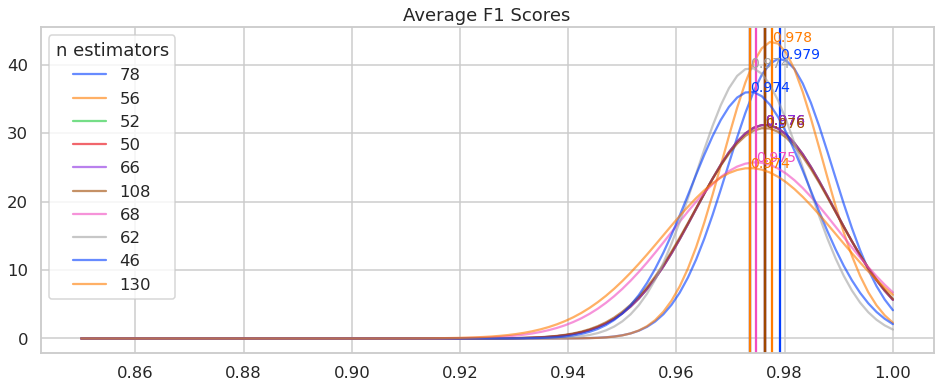

In [8]:
plot_some_tune_results(top_n_df)

In [10]:
%load_ext tensorboard
from tensorboard import notebook 
%tensorboard --logdir "~/ray_results/grid_search"

Reusing TensorBoard on port 6006 (pid 56090), started 0:05:37 ago. (Use '!kill 56090' to kill it.)

In [11]:
ray.shutdown()